In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
def granger_causality(data, maxlag):
    """
    Perform the Granger Causality test and return the p-values and F-statistics for each tested lag.
    """
    results = grangercausalitytests(data, maxlag, verbose=False)
    p_values = [round(results[i+1][0]['ssr_ftest'][1],4) for i in range(maxlag)]
    f_statistics = [round(results[i+1][0]['ssr_ftest'][0],4) for i in range(maxlag)]
    return p_values, f_statistics

In [3]:
np.random.seed(0)

In [4]:
n_samples = 500
lag = 3
noise_scale = 0.1

Generate the X series

In [5]:
X = np.random.normal(size=n_samples)

Generate the Y series

In [6]:
Y = np.zeros(n_samples)
Y[lag:] = X[:-lag] + noise_scale * np.random.normal(size=n_samples-lag)  # Y is influenced by X with a certain lag

Stack Y and X (Y first, because we want to see if X Granger-causes Y)

In [7]:
data = np.column_stack([Y, X])

Run the test

In [8]:
maxlag = 5
p_values, f_statistics = granger_causality(data, maxlag)

C:\Users\i.kagan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Print the results

In [9]:
print("Lag\t p-val \t F-stat")
for i in range(maxlag):
    print(f'{i+1}\t {p_values[i]}\t {f_statistics[i]}')
    
"""
test = 'ssr_chi2test'
result = grangercausalitytests(data, maxlag, verbose=False)
p_values = [round(result[i+1][0][test][1],4) for i in range(maxlag)]
print("Lag : p-value")
for i in range(maxlag):
    print(f'{i+1} : {p_values[i]}')
"""

Lag	 p-val 	 F-stat
1	 0.2461	 1.3484
2	 0.449	 0.802
3	 0.0	 16955.3409
4	 0.0	 12565.5894
5	 0.0	 9997.684


'\ntest = \'ssr_chi2test\'\nresult = grangercausalitytests(data, maxlag, verbose=False)\np_values = [round(result[i+1][0][test][1],4) for i in range(maxlag)]\nprint("Lag : p-value")\nfor i in range(maxlag):\n    print(f\'{i+1} : {p_values[i]}\')\n'

Plot the two time series

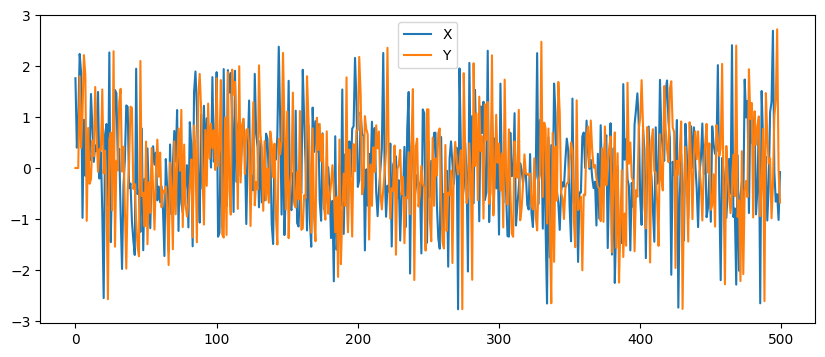

In [10]:
plt.figure(figsize=(10,4))
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.legend()
plt.show()